In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv')
print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

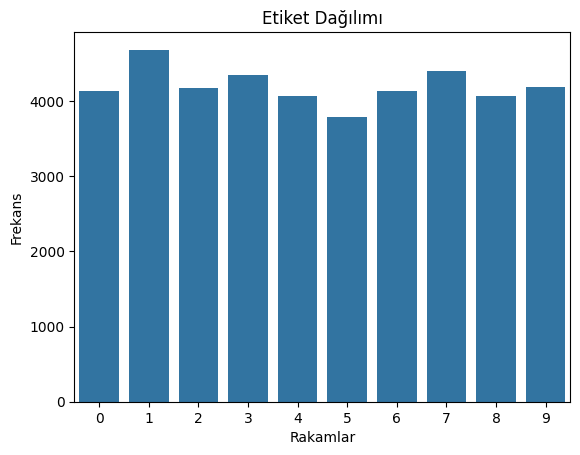

In [6]:
#etiketlerin dağılımını görselleştirme 
sns.countplot(x='label', data=train_data)
plt.title('Etiket Dağılımı')
plt.xlabel('Rakamlar')
plt.ylabel('Frekans')
plt.show

In [7]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dizin yolunu tanımla
directory = r'C:\Users\FUNDA TAŞDEMİR\OneDrive\Masaüstü\yüksekdüzeyproglamaproje'

# Train verisini yükle
data = pd.read_csv(os.path.join(directory, 'train.csv'))  # Doğru dosya adı
X = data.drop('label', axis=1)  # Özellikler
y = data['label']  # Etiketler

# Veriyi eğitim ve test setlerine %60 - %40 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Lojistik regresyon modeli oluştur
model = LogisticRegression(max_iter=1000)

# Modeli eğit
model.fit(X_train, y_train)

# Test seti ile tahmin yap
y_pred = model.predict(X_test)

# Doğruluğu değerlendir
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy:.2f}")


Modelin doğruluk oranı: 0.89


c:\Users\FUNDA TAŞDEMİR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


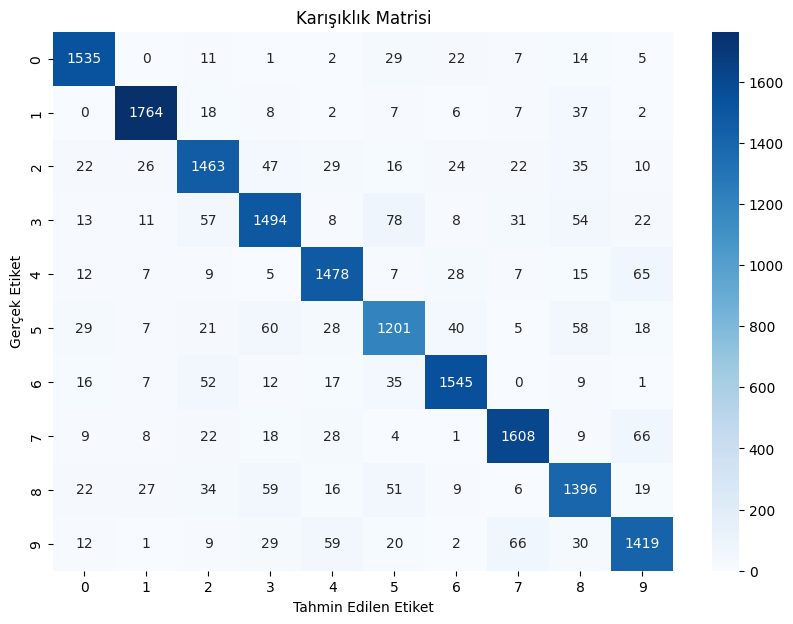

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()


In [9]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1626
           1       0.95      0.95      0.95      1851
           2       0.86      0.86      0.86      1694
           3       0.86      0.84      0.85      1776
           4       0.89      0.91      0.90      1633
           5       0.83      0.82      0.82      1467
           6       0.92      0.91      0.91      1694
           7       0.91      0.91      0.91      1773
           8       0.84      0.85      0.85      1639
           9       0.87      0.86      0.87      1647

    accuracy                           0.89     16800
   macro avg       0.89      0.89      0.89     16800
weighted avg       0.89      0.89      0.89     16800



KNN Modelinin doğruluk oranı: 0.93


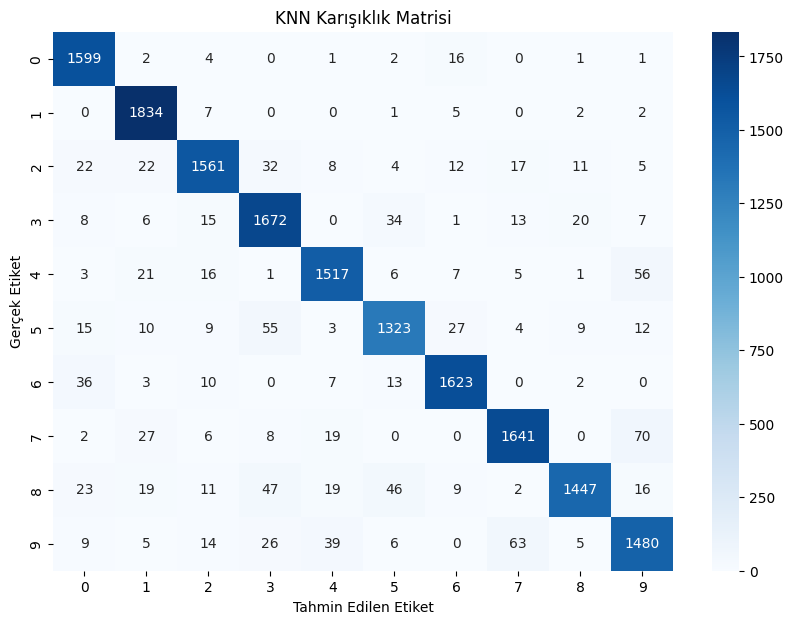

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1626
           1       0.94      0.99      0.97      1851
           2       0.94      0.92      0.93      1694
           3       0.91      0.94      0.92      1776
           4       0.94      0.93      0.93      1633
           5       0.92      0.90      0.91      1467
           6       0.95      0.96      0.96      1694
           7       0.94      0.93      0.93      1773
           8       0.97      0.88      0.92      1639
           9       0.90      0.90      0.90      1647

    accuracy                           0.93     16800
   macro avg       0.93      0.93      0.93     16800
weighted avg       0.93      0.93      0.93     16800



In [10]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Dizin yolunu tanımla
directory = r'C:\Users\FUNDA TAŞDEMİR\OneDrive\Masaüstü\yüksekdüzeyproglamaproje'

# Train verisini yükle
data = pd.read_csv(os.path.join(directory, 'train.csv'))  # Doğru dosya adı
X = data.drop('label', axis=1)  # Özellikler
y = data['label']  # Etiketler

# Veriyi eğitim ve test setlerine %60 - %40 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Özellikleri normalleştir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Modeli oluştur
knn_model = KNeighborsClassifier(n_neighbors=3)  # Komşu sayısını 3 olarak ayarladık

# Modeli eğitim verisi ile eğit
knn_model.fit(X_train, y_train)

# Test seti ile tahmin yap
knn_predictions = knn_model.predict(X_test)

# Doğruluğu değerlendir
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Modelinin doğruluk oranı: {knn_accuracy:.2f}")

# Karışıklık matrisini hesapla
knn_cm = confusion_matrix(y_test, knn_predictions)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10,7))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('KNN Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporunu yazdır
knn_report = classification_report(y_test, knn_predictions)
print(knn_report)


In [11]:
from sklearn.ensemble import RandomForestClassifier


In [12]:
# Random Forest Modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 ağaçla başlıyoruz

# Modeli eğitim verisi ile eğit
rf_model.fit(X_train, y_train)

# Test setinde tahmin yap
rf_predictions = rf_model.predict(X_test)


Random Forest Modelinin doğruluk oranı: 0.96


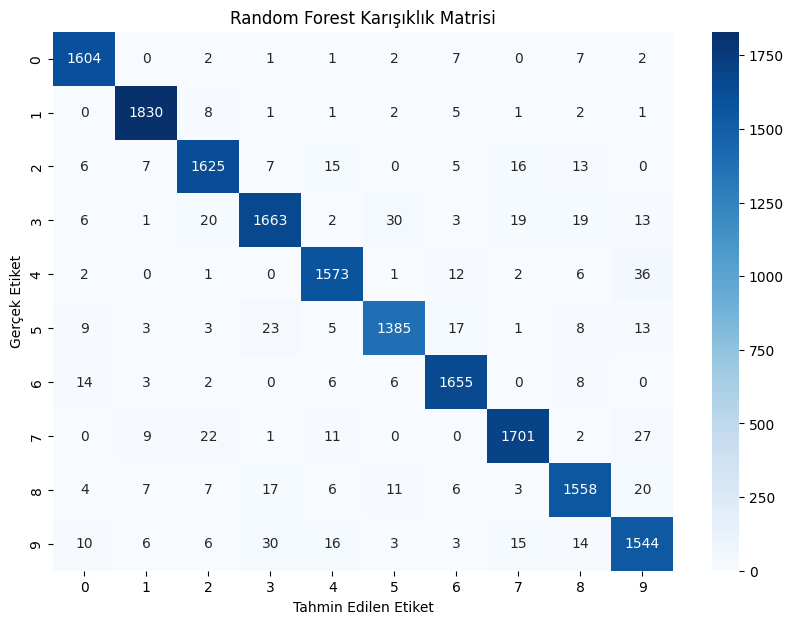

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.98      0.99      0.98      1851
           2       0.96      0.96      0.96      1694
           3       0.95      0.94      0.95      1776
           4       0.96      0.96      0.96      1633
           5       0.96      0.94      0.95      1467
           6       0.97      0.98      0.97      1694
           7       0.97      0.96      0.96      1773
           8       0.95      0.95      0.95      1639
           9       0.93      0.94      0.93      1647

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Doğruluğu değerlendir
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Modelinin doğruluk oranı: {rf_accuracy:.2f}")

# Karışıklık matrisini hesapla
rf_cm = confusion_matrix(y_test, rf_predictions)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Random Forest Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporunu yazdır
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


In [15]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dizin yolunu tanımla
directory = r'C:\Users\FUNDA TAŞDEMİR\OneDrive\Masaüstü\yüksekdüzeyproglamaproje'

# Train verisini yükle
data = pd.read_csv(os.path.join(directory, 'train.csv'))  # Doğru dosya adı
X = data.drop('label', axis=1)  # Özellikler
y = data['label']  # Etiketler

# Veriyi eğitim ve test setlerine %60 - %40 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Random Forest Modeli
rf_model = RandomForestClassifier(random_state=42)

# Hiperparametrelerin belirlenmesi
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Modeli eğitim verisi ile eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi doğruluk skoru: {grid_search.best_score_:.2f}")

# En iyi model ile test et
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

# Doğruluğu değerlendir
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Grid Search ile Optimize Edilmiş Random Forest Modelinin doğruluk oranı: {rf_accuracy:.2f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
En iyi parametreler: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}
En iyi doğruluk skoru: 0.96
Grid Search ile Optimize Edilmiş Random Forest Modelinin doğruluk oranı: 0.96


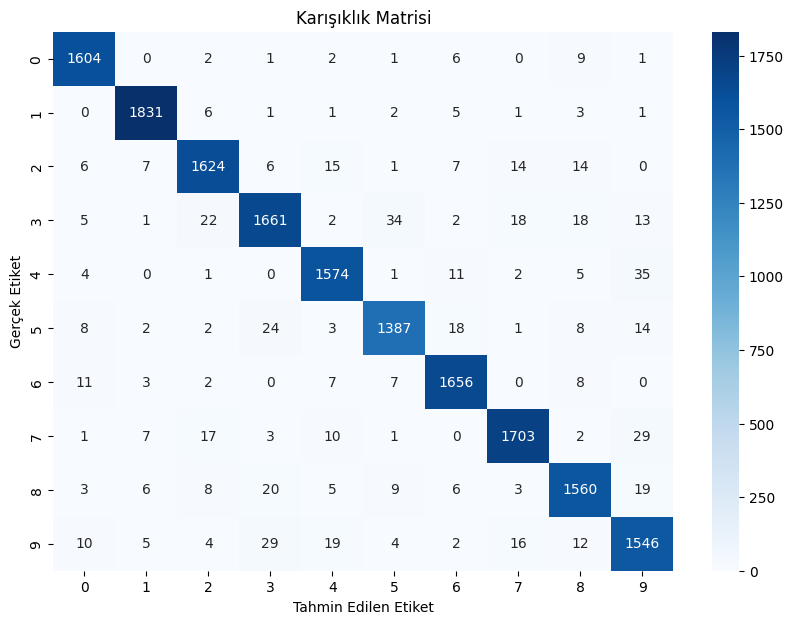

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.98      0.99      0.99      1851
           2       0.96      0.96      0.96      1694
           3       0.95      0.94      0.94      1776
           4       0.96      0.96      0.96      1633
           5       0.96      0.95      0.95      1467
           6       0.97      0.98      0.97      1694
           7       0.97      0.96      0.96      1773
           8       0.95      0.95      0.95      1639
           9       0.93      0.94      0.94      1647

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Dizin yolunu tanımla
directory = r'C:\Users\FUNDA TAŞDEMİR\OneDrive\Masaüstü\yüksekdüzeyproglamaproje'

# Train verisini yükle
data = pd.read_csv(os.path.join(directory, 'train.csv'))  # Doğru dosya adı
X = data.drop('label', axis=1)  # Özellikler
y = data['label']  # Etiketler

# Veriyi eğitim ve test setlerine %60 - %40 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Random Forest Modeli
rf_model = RandomForestClassifier(random_state=42)

# Hiperparametrelerin belirlenmesi
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Modeli eğitim verisi ile eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi doğruluk skoru: {grid_search.best_score_:.2f}")

# En iyi model ile test et
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

# Doğruluğu değerlendir
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Grid Search ile Optimize Edilmiş Random Forest Modelinin doğruluk oranı: {rf_accuracy:.2f}")

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, rf_predictions)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))  # seaborn ile görselleştirme
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporunu yazdır
report = classification_report(y_test, rf_predictions)
print(report)
